## Tarefa 1: Carregamento e Visualização de Imagens

1. Baixe um conjunto de imagens de exemplo (por exemplo, fotos de animais, frutas, veículos,
etc.).

2. Escreva um script em Python para carregar e visualizar algumas dessas imagens usando
uma biblioteca de processamento de imagens, como OpenCV ou PIL.

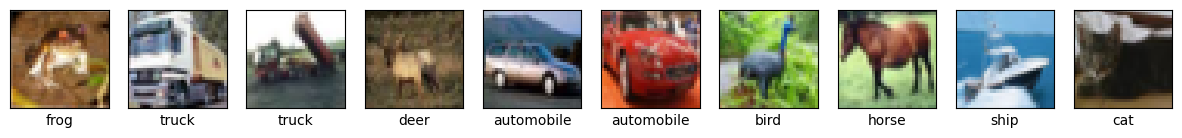

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Carregar o dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Função para visualizar algumas imagens
def visualize_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(15,15))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar 10 imagens de exemplo
visualize_images(train_images, train_labels, class_names)

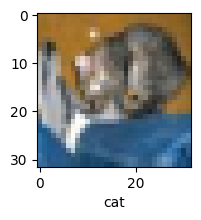

In [50]:
  # Plot da primeira imagem do dataset de teste
  plt.figure(figsize=(2,2))
  plt.imshow(test_images[0])
  plt.xlabel(class_names[test_labels[0][0]])
  plt.show()

In [51]:
test_images.shape

(10000, 32, 32, 3)

## Tarefa 2: Pré-processamento de Imagens

Utilizando o conjunto de imagens carregado na Tarefa 1, realize as seguintes operações de pré-
processamento:

1. Redimensione todas as imagens para uma resolução específica, por exemplo, 224x224 pixels.
2. Normalize os valores dos pixels para o intervalo [0, 1].
3. Converta as imagens para o formato adequado para alimentação em modelos de
aprendizado profundo (por exemplo, numpy arrays para TensorFlow ou PyTorch).

In [52]:
import numpy as np

# Função para redimensionar imagens
def resize_images(images, size=(34, 34)):
    resized_images = []
    for image in images:
        pil_image = Image.fromarray(image)
        pil_image = pil_image.resize(size)
        resized_images.append(np.array(pil_image))
    return np.array(resized_images)

# Redimensionar as imagens de treino e teste
train_images_resized = resize_images(train_images)
test_images_resized = resize_images(test_images)

# Normalizar os valores dos pixels
train_images_resized = train_images_resized / 255.0
test_images_resized = test_images_resized / 255.0

# Verificar as formas dos arrays redimensionados
print(f'Train images shape: {train_images_resized.shape}')
print(f'Test images shape: {test_images_resized.shape}')

# As imagens já estão no formato numpy arrays, prontas para serem usadas em modelos de aprendizado profundo

Train images shape: (50000, 34, 34, 3)
Test images shape: (10000, 34, 34, 3)


In [53]:
# Função para verificar a normalização dos pixels
def check_normalization(array):
    if np.all(array >= 0) and np.all(array <= 1):
        print("Todos os pixels estão corretamente normalizados entre 0 e 1.")
    else:
        print("Há pixels fora do intervalo [0, 1].")

# Checar a normalização das imagens de treino e teste
check_normalization(train_images_resized)
check_normalization(test_images_resized)

Todos os pixels estão corretamente normalizados entre 0 e 1.
Todos os pixels estão corretamente normalizados entre 0 e 1.


## Tarefa 3: Classificação de Imagens com Redes Neurais Convolucionais (CNN)
Desenvolva um modelo de classificação de imagens utilizando uma arquitetura de Rede Neural
Convolucional (CNN). Realize as seguintes tarefas:
1. Divida seu conjunto de dados em conjuntos de treinamento e teste.
2. Projete e treine uma CNN usando uma biblioteca de aprendizado profundo, como
TensorFlow ou PyTorch.
3. Avalie o desempenho do modelo usando os dados de teste. Calcule a acurácia do modelo.
4. Dado uma nova imagem, utilize o modelo treinado para prever sua classe.

In [54]:
# Combinar os dados de treinamento e teste para mostrar como faz o train_test_split
combined_images = np.concatenate((train_images_resized, test_images_resized), axis=0)
combined_labels = np.concatenate((train_labels, test_labels), axis=0)

In [55]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados combinado em novos conjuntos de treinamento e teste
train_images_final, test_images_final, train_labels_final, test_labels_final = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42)

# Verificar as formas dos novos conjuntos
print(f'New training set shape: {train_images_final.shape}')
print(f'New test set shape: {test_images_final.shape}')

New training set shape: (48000, 34, 34, 3)
New test set shape: (12000, 34, 34, 3)


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir a arquitetura da CNN
model = Sequential([
    Conv2D(34, (3, 3), activation='relu', input_shape=(34, 34, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images_final, train_labels_final, epochs=2,
                    validation_data=(test_images_final, test_labels_final))

# Avaliar o modelo
loss, accuracy = model.evaluate(test_images_final, test_labels_final)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Predizer a classe de uma nova imagem
def predict_image(model, image, class_names):
    img = np.expand_dims(image, axis=0)  # Adicionar uma dimensão para representar o batch
    prediction = model.predict(img)
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

# Exemplo de predição
example_image = test_images_final[0]
predicted_class = predict_image(model, example_image, class_names)
print(f'Predicted class: {predicted_class}')


Epoch 1/2
1500/1500 [==============================] - 92s 61ms/step - loss: 1.5923 - accuracy: 0.4134 - val_loss: 1.2714 - val_accuracy: 0.5485
Epoch 2/2
375/375 [==============================] - 7s 19ms/step - loss: 1.0792 - accuracy: 0.6150
Loss: 1.0791701078414917
Accuracy: 0.6150000095367432
1/1 [==============================] - 0s 86ms/step
Predicted class: automobile


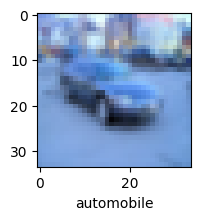

In [57]:
  plt.figure(figsize=(2,2))
  plt.imshow(test_images_final[0])
  plt.xlabel(class_names[test_labels_final[0][0]])
  plt.show()

## Tarefa 4: Transfer Learning
Utilize uma rede neural pré-treinada (por exemplo, VGG, ResNet, Inception) e realize transfer
learning para treinar um classificador em seu conjunto de dados. Realize as seguintes tarefas:
1. Carregue o modelo pré-treinado e remova a camada de classificação final.
2. Adicione uma nova camada de classificação adequada para seu conjunto de dados.

3. Treine apenas os parâmetros da nova camada de classificação, mantendo os pesos das
camadas pré-treinadas fixos.
4. Avalie o desempenho do modelo usando os dados de teste.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Carregar o modelo VGG16 pré-treinado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(34, 34, 3))

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Adicionar novas camadas de classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images_final, train_labels_final, epochs=2,
                    validation_data=(test_images_final, test_labels_final))

# Avaliar o modelo
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Epoch 1/2
 358/1500 [======>.......................] - ETA: 7:03 - loss: 1.6490 - accuracy: 0.4176